In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Major Project/Exoplanets/Data/exoplanets_2018.csv")
df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [5]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [6]:
df.isnull().sum() 

kepid                   0
kepoi_name              0
kepler_name          7205
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

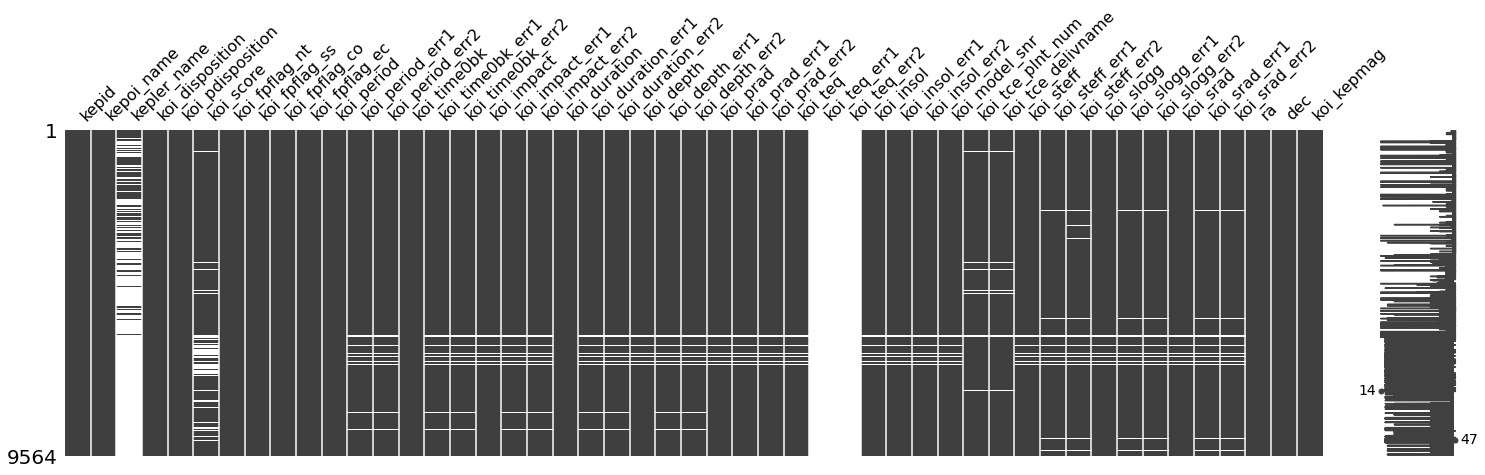

In [7]:
mno.matrix(df, figsize = (25, 6))

Dropping Irrelevant Columns from the dataframe

In [8]:
df.drop(columns=['kepid', 'kepoi_name', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


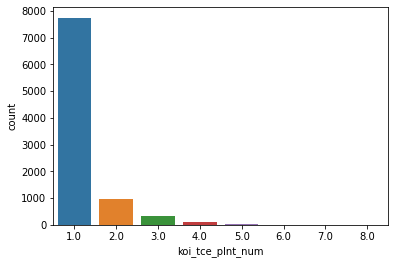

In [9]:
sns.countplot(df['koi_tce_plnt_num'])

Convert TCE Planet Number to integer datatype

In [10]:
df['koi_tce_plnt_num'] = df['koi_tce_plnt_num'].astype('Int64')
df.dtypes

koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       Int64
koi_tce_delivname     object
koi_steff            float64
koi_steff_err1       float64
koi_steff_err2

In [11]:
dispositions = df.iloc[:, 0:2]
df = df.iloc[:, 2:]

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dispositions['koi_disposition'] = le.fit_transform(dispositions['koi_disposition'])
dispositions['koi_pdisposition'] = le.fit_transform(dispositions['koi_pdisposition'])
dispositions

,koi_disposition,koi_pdisposition
0,1,0
1,1,0
2,0,0
3,2,1
4,1,0
...,...,...
9559,2,1
9560,0,0
9561,2,1
9562,0,0


# **Processing Missing Data**

filling the missing integers according to their occurences 

In [13]:
df['koi_tce_plnt_num'].value_counts()

1    7745
2     972
3     326
4     111
5      41
6      14
7       8
8       1
Name: koi_tce_plnt_num, dtype: Int64

In [14]:
print("Percentage of 1s", (7745/(9564-346))*100, "\nPercentage of 2s", (972/(9564-346))*100,
      "\nPercentage of 3s", (320/(9564-346))*100, "\nPercentage of 4s", (111/(9564-346))*100, 
      "\nPercentage of 5s", (41/(9564-346))*100, "\nPercentage of 6s", (14/(9564-346))*100, 
      "\nPercentage of 7s", (8/(9564-346))*100, "\nPercentage of 8s", (1/(9564-346))*100)

Percentage of 1s 84.02039487958342 
Percentage of 2s 10.544586678238229 
Percentage of 3s 3.4714688652636148 
Percentage of 4s 1.2041657626383162 
Percentage of 5s 0.44478194836190066 
Percentage of 6s 0.15187676285528315 
Percentage of 7s 0.08678672163159037 
Percentage of 8s 0.010848340203948797


the occurences of numbers beyond 4 can be ignored

In [15]:
print('1s to be filled: ', int((84.02039487958342/100)*346), '\n2s to be filled: ', int((10.544586678238229/100)*346),
      '\n3s to be filled: ', int((3.4714688652636148 /100)*346), '\n4s to be filled: ', int((1.2041657626383162/100)*346))

1s to be filled:  290 
2s to be filled:  36 
3s to be filled:  12 
4s to be filled:  4


In [16]:
print("Number of 1s to be filled", 346 - (290 + 36 + 12 + 4))

Number of 1s to be filled 4


In [17]:
fillna = []
fillna.extend([1]*(290 + 4) + 
              [2]*(36) + 
              [3]*(12) + 
              [4]*(4)
              )
print(fillna)
print(len(fillna))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 

In [18]:
df['koi_tce_plnt_num'].fillna(-1, inplace=True)

In [19]:
num = 0
random.shuffle(fillna)
planetNumber = list(df['koi_tce_plnt_num'])
for i in range(len(planetNumber)):
  if planetNumber[i] == -1:
    planetNumber[i] = fillna[num]
    num += 1
planetNumber

[1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 4,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 5,
 2,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 3,
 4,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 1,
 2,


In [20]:
planetNumber = pd.DataFrame(planetNumber, columns=['koi_tce_plnt_num'])
df['koi_tce_plnt_num'] = planetNumber['koi_tce_plnt_num']

In [21]:
df.head(3)

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,0.000015,-0.000015,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436


In [22]:
df['koi_tce_plnt_num'].isnull().sum()

0

Replacing missing values with most repeated values for object data types


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


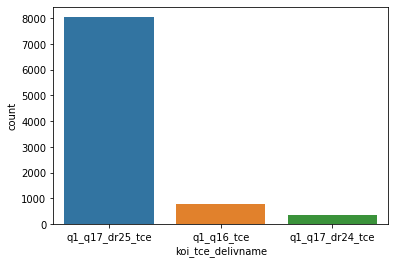

In [23]:
sns.countplot(df['koi_tce_delivname'])

In [24]:
df['koi_tce_delivname'].value_counts()

q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: koi_tce_delivname, dtype: int64

In [25]:
print("Percentage of q1_q17_dr25_tce", (8054/(9564-346))*100, 
      "\nPercentage of q1_q16_tce", (796/(9564-346))*100,
      "\nPercentage of q1_q17_dr24_tce", (368/(9564-346))*100)

Percentage of q1_q17_dr25_tce 87.37253200260359 
Percentage of q1_q16_tce 8.63527880234324 
Percentage of q1_q17_dr24_tce 3.992189195053157


In [26]:
print('q1_q17_dr25_tce to be filled: ', int((87.37253200260359/100)*346),
      '\nq1_q16_tce to be filled: ', int((8.63527880234324/100)*346),
      '\nq1_q17_dr24_tce to be filled: ', int((3.992189195053157/100)*346))

q1_q17_dr25_tce to be filled:  302 
q1_q16_tce to be filled:  29 
q1_q17_dr24_tce to be filled:  13


In [27]:
print("q1_q17_dr25_tce to be filled: ", 346-(302 + 29 + 13))

q1_q17_dr25_tce to be filled:  2


In [28]:
fillna = []
fillna.extend(['q1_q17_dr25_tce']*(302 + 2)+
               ['q1_q16_tce']*(29) +
               ['q1_q17_dr24_tce']*(13))
print(fillna)
len(fillna)

['q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr25_tce', 'q1_q17_dr2

346

In [29]:
df['koi_tce_delivname'].fillna(-1, inplace=True)

In [30]:
num = 0
random.shuffle(fillna)
deliveryName = list(df['koi_tce_delivname'])
for i in range(len(deliveryName)):
  if deliveryName[i] == -1:
    deliveryName[i] = fillna[num]
    num += 1
deliveryName

['q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q16_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_q17_dr25_tce',
 'q1_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


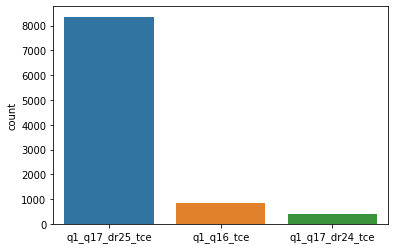

In [31]:
sns.countplot(deliveryName)

Label Encoding the objects to numeric data

In [32]:
for i in range(len(deliveryName)):
  if deliveryName[i] == 'q1_q17_dr25_tce':
    deliveryName[i] = 0
  elif deliveryName[i] == 'q1_q16_tce':
    deliveryName[i] = 1
  else:
    deliveryName[i] = 2

In [33]:
deliveryName = pd.DataFrame(deliveryName, columns=['koi_tce_delivname'])
df['koi_tce_delivname'] = deliveryName['koi_tce_delivname']

Regression Imputation for Float

In [34]:
missing_columns = list(set(df.columns) - {'koi_disposition', 'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_time0bk', 'koi_duration', 'ra', 'dec'})

In [35]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [36]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [37]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])
random_data

,Rankoi_duration_err1,Rankoi_slogg,Rankoi_prad_err2,Rankoi_depth_err2,Rankoi_insol_err1,Rankoi_slogg_err2,Rankoi_steff_err2,Rankoi_teq,Rankoi_time0bk_err2,Rankoi_duration_err2,...,Rankoi_depth,Rankoi_insol,Rankoi_depth_err1,Rankoi_impact_err1,Rankoi_prad,Rankoi_model_snr,Rankoi_steff,Rankoi_kepmag,Rankoi_srad,Rankoi_score


In [38]:
from sklearn.linear_model import LinearRegression

for feature in missing_columns:
  random_data["Ran" + feature] = df[feature + '_imp']
  parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
  model = LinearRegression()
  model.fit(X = df[parameters], y = df[feature + '_imp'])
  regressor = model.predict(df[parameters])

  std_error = (regressor[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
  random_predict = np.random.normal(size = df[feature].shape[0], 
                                    loc = regressor, 
                                    scale = std_error)
  random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & (random_predict > 0)]

In [39]:
random_data.isnull().sum()

Rankoi_duration_err1    0
Rankoi_slogg            0
Rankoi_prad_err2        0
Rankoi_depth_err2       0
Rankoi_insol_err1       0
Rankoi_slogg_err2       0
Rankoi_steff_err2       0
Rankoi_teq              0
Rankoi_time0bk_err2     0
Rankoi_duration_err2    0
Rankoi_srad_err1        0
Rankoi_prad_err1        0
Rankoi_tce_delivname    0
Rankoi_period_err2      0
Rankoi_time0bk_err1     0
Rankoi_impact_err2      0
Rankoi_period_err1      0
Rankoi_insol_err2       0
Rankoi_slogg_err1       0
Rankoi_impact           0
Rankoi_srad_err2        0
Rankoi_period           0
Rankoi_steff_err1       0
Rankoi_tce_plnt_num     0
Rankoi_depth            0
Rankoi_insol            0
Rankoi_depth_err1       0
Rankoi_impact_err1      0
Rankoi_prad             0
Rankoi_model_snr        0
Rankoi_steff            0
Rankoi_kepmag           0
Rankoi_srad             0
Rankoi_score            0
dtype: int64

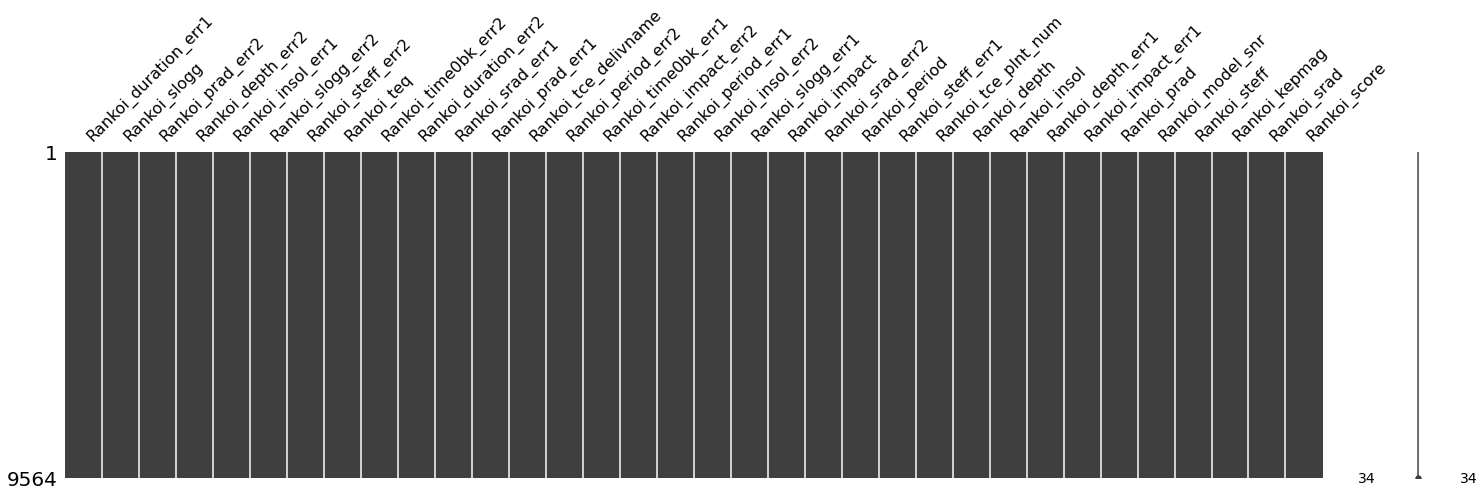

In [40]:
mno.matrix(random_data, figsize = (25, 6))

In [41]:
for feature in missing_columns:
  df[feature] = random_data["Ran" +feature]
df=df.iloc[:, :42]

In [42]:
df = pd.concat([df, dispositions], axis=1)

In [43]:
df.columns

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag', 'koi_disposition', 'koi_pdisposition'],
      dtype='object')

In [44]:
df = df.rename(columns = {'koi_score' : 'Disposition Score',
                     'koi_fpflag_nt' : 'Not Transit-Like FPF',
                     'koi_fpflag_ss' : 'Stellar Eclipse FPF',
                     'koi_fpflag_co' : 'Centroid Offset FPF',
                     'koi_fpflag_ec' : 'Ephemeris Contamination FPF',
                     'koi_period' : 'Orbital Period',
                     'koi_period_err1' : 'Orbital Period Upper',
                     'koi_period_err2' : 'Orbital Period Lower',
                     'koi_time0bk' : 'Transit Epoch',
                     'koi_time0bk_err1' : 'Transit Epoch Upper',
                     'koi_time0bk_err2' : 'ransit Epoch Lower',
                     'koi_impact' : 'Impact Parameter',
                     'koi_impact_err1' : 'mpact Parameter Upper',
                     'koi_impact_err2' : 'Impact Parameter Lower',
                     'koi_duration' : 'Transit Duration ',
                     'koi_duration_err1' : 'Transit Duration Upper',
                     'koi_duration_err2' : 'Transit Duration Lower ',
                     'koi_depth' : 'Transit Depth',
                     'koi_depth_err1' : 'Transit Depth Upper',
                     'koi_depth_err2' : 'Transit Depth Lower',
                     'koi_prad' : 'Planetary Radius',
                     'koi_prad_err1' : 'Planetary Radius Upper ',
                     'koi_prad_err2' : 'Planetary Radius Lower',
                     'koi_teq' : 'Equilibrium Temperature',
                     'koi_insol' : 'Insolation Flux',
                     'koi_insol_err1' : 'Insolation Flux Upper',
                     'koi_insol_err2' : 'Insolation Flux Lower ',
                     'koi_model_snr' : 'Transit Signal-to-Noise',
                     'koi_tce_plnt_num' : 'TCE Planet Number',
                     'koi_tce_delivname' : 'TCE Delivery',
                     'koi_steff' : 'Stellar Effective Temperature',
                     'koi_steff_err1' : 'Stellar Effective Temperature Upper',
                     'koi_steff_err2' : 'Stellar Effective Temperature Lower',
                     'koi_slogg' : 'Stellar Surface Gravity',
                     'koi_slogg_err1' : 'Stellar Surface Gravity Upper ',
                     'koi_slogg_err2' : 'Stellar Surface Gravity Lower',
                     'koi_srad' : 'Stellar Radius',
                     'koi_srad_err1' : 'Stellar Radius Upper',
                     'koi_srad_err2' : 'Stellar Radius Lower',
                     'ra' : 'RA',
                     'dec' : 'Dec',
                     'koi_kepmag' : 'Kepler-band',
                     'koi_disposition' : 'Exoplanet Archive Disposition',
                     'koi_pdisposition' : 'Disposition Using Kepler Data'
                     })

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


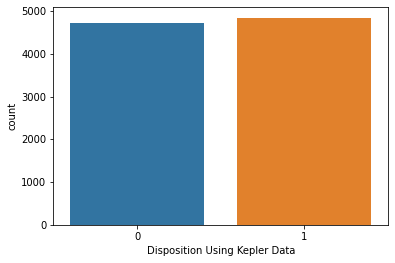

In [46]:
sns.countplot(df['Disposition Using Kepler Data'])

In [ ]:
# df.to_csv("/content/drive/MyDrive/Major Project/Exoplanets/Data/cleaned_exoplanets_2018.csv", encoding='utf-8', index=False)